In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import requests
import nltk
import string
import re
# import itable
import operator
import os
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
# from prettytable import PrettyTable
%matplotlib inline

In [5]:
ddff2 = pd.read_csv("ddx_3_vs_all.csv", names = ["Term", "Attr Score"])
ddff2 = ddff2[ddff2.Term != 'Term']
ddff2.head()
ddff2['Attr Score'] = ddff2['Attr Score'].apply(pd.to_numeric)

# ddff2 = pd.read_csv("big_clus9.csv", header = None, names = ["Term", "Freq"])
# ddff2.head()

ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

In [174]:
# Convert into dictionary
tf_dict = ddff2.set_index('Term').to_dict()
type(tf_dict.values()[0])

tf_dict.values()[0].pop('tumor')
tf_dict.values()[0].pop('trauma')
tf_dict.values()[0].pop('soft_tissue')
tf_dict.values()[0].pop('bones')
tf_dict.values()[0].pop('may_be')
tf_dict.values()[0].pop('coarctation')

0.0

In [175]:
sorted(tf_dict.values()[0].items(), key = lambda x: x[1], reverse = True)

[('lesion', 80.0),
 ('right', 69.0),
 ('fracture', 51.0),
 ('bladder', 42.0),
 ('obstruction', 35.0),
 ('short', 33.0),
 ('torsion', 26.0),
 ('tissue', 19.0),
 ('distal', 16.0),
 ('right_atrium', 16.0),
 ('major', 16.0),
 ('large', 14.0),
 ('inferior', 14.0),
 ('female', 13.0),
 ('complex', 12.0),
 ('pelvis', 12.0),
 ('total', 11.0),
 ('abnormal', 11.0),
 ('first', 11.0),
 ('duodenum', 10.0),
 ('cystic', 10.0),
 ('colon', 9.0),
 ('fluid', 8.0),
 ('seizure', 8.0),
 ('cortex', 8.0),
 ('medial', 8.0),
 ('surgery', 8.0),
 ('progressive', 8.0),
 ('calcifications', 8.0),
 ('tubular', 8.0),
 ('third', 7.0),
 ('meconium', 7.0),
 ('carcinoma', 7.0),
 ('normal', 7.0),
 ('small', 7.0),
 ('growth', 7.0),
 ('smooth', 7.0),
 ('neuroblastoma', 7.0),
 ('ureter', 6.0),
 ('thyroid', 6.0),
 ('focus', 6.0),
 ('thymoma', 6.0),
 ('hemorrhage', 6.0),
 ('cerebral_palsy', 6.0),
 ('bilateral', 6.0),
 ('trunk', 6.0),
 ('injury', 6.0),
 ('blood', 6.0),
 ('mixed', 6.0),
 ('dermatomyositis', 6.0),
 ('portal_hyperte

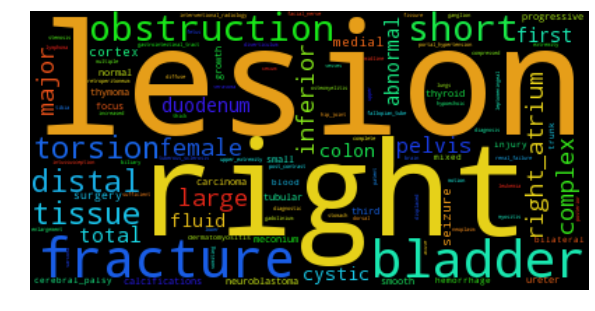

In [176]:
# Wordcloud for all leaf nodes of MIRC RSNa

wordcloud = WordCloud(max_words=200).generate_from_frequencies(tf_dict.values()[0].items())
# Open a plot of the generated image.
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off"); 